In [1]:
## 設定
verbose = False

### 言語の割合の均等化
balanced = True

### LDA 用

## トピック数
n_topics = 15 # 30は多過ぎる？

## doc, term の設定
doc_type      = 'form'
doc_attr      = 'spell'
max_doc_size  = 12
##
term_size = 'character'
term_type = '1gram'
## skippy n-gram の結合範囲
max_distance_val = round(max_doc_size * 0.8)
print(f"max_distance_val: {max_distance_val}")

## ngram を包括的にするかどうか
ngram_is_inclusive = True

### DTM 構築

## term の最低頻度
term_min_freq = 2

## 高頻度 term の濫用指標: 大きくし過ぎないように．0.05 は十分に大きい
term_abuse_threshold = 0.04

max_distance_val: 10


In [2]:
import sys, os, random, re, glob
import pandas as pd
import pprint as pp
from functools import reduce

In [3]:
## load data to process
from pathlib import Path
import pprint as pp

wd = Path(".")
##
dirs = [ x for x in wd.iterdir() if x.is_dir() and not x.match(r"plot*") ]
if verbose:
    print(f"The following {len(dirs)} directories are potential targets:")
    pp.pprint(dirs)

## list up files in target directory 
wd = Path(".")
target_dir = "data-words" # can be changed
target_files = sorted(list(wd.glob(f"{target_dir}/*.csv")))
#
print(f"\n{target_dir} contains {len(target_files)} files to process")
pp.pprint(target_files)


data-words contains 19 files to process
[PosixPath('data-words/base-sound-English-r6e-originals.csv'),
 PosixPath('data-words/base-sound-French-r0-opendic-s900.csv'),
 PosixPath('data-words/base-sound-German-r1a-original.csv'),
 PosixPath('data-words/base-spell-Arabic-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-Chinese-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-English-r6e-originals.csv'),
 PosixPath('data-words/base-spell-Esperanto-r0-orginal.csv'),
 PosixPath('data-words/base-spell-Finnish-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-French-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-German-r1a-originals.csv'),
 PosixPath('data-words/base-spell-Hungarian-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-Icelandic-r0-original.csv'),
 PosixPath('data-words/base-spell-Irish-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-Italian-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-Japanese-r0-1k-mc.csv'),
 PosixPath('data-words/base-spell-Russian-r0-1k-mc.csv'),


In [4]:
import pandas as pd

## データ型の辞書
types = re.split(r",\s+", "spell, sound, freq")
type_settings = { t : 0 for t in types }
print(type_settings)

## 言語名の辞書
lang_name_text = "arabic, bengali, chinese, english, esperanto, finnish, french, \
galician, german, hungarian, icelandic, irish, italian, japanese, russian, spanish, swahili, turkish"

langs = re.split(r",\s*", lang_name_text)
#langs = "english esperanto french german russian swahili".split(" ")
#langs = "english esperanto french german icelandic swahili".split(" ")
lang_settings = { lang : 0 for lang in langs }
print(f"{len(lang_settings.keys())} langs are available")
print(lang_settings)

## 辞書と統合
settings = { 'form': None, **type_settings, **lang_settings }
print(settings)

{'spell': 0, 'sound': 0, 'freq': 0}
16 langs are available
{'arabic': 0, 'chinese': 0, 'english': 0, 'esperanto': 0, 'finnish': 0, 'french': 0, 'german': 0, 'hungarian': 0, 'icelandic': 0, 'irish': 0, 'italian': 0, 'japanese': 0, 'russian': 0, 'spanish': 0, 'swahili': 0, 'turkish': 0}
{'form': None, 'spell': 0, 'sound': 0, 'freq': 0, 'arabic': 0, 'chinese': 0, 'english': 0, 'esperanto': 0, 'finnish': 0, 'french': 0, 'german': 0, 'hungarian': 0, 'icelandic': 0, 'irish': 0, 'italian': 0, 'japanese': 0, 'russian': 0, 'spanish': 0, 'swahili': 0, 'turkish': 0}


In [5]:
vars = list(settings.keys())
print(f"targe var names: {vars}")
d_parts = [ ]
for lang in langs:
    local_settings = settings.copy()
    print(f"processing: {lang}")
    try:
        for f in [ f for f in target_files if lang.capitalize() in str(f) ]:
            print(f"reading: {f}")
            # 言語名の指定
            local_settings[lang] = 1
            # 型名の指定
            for type in vars:
                if type in str(f):
                    local_settings[type] = 1
            #
            try:
                d = pd.read_csv(f, encoding='utf-8', sep = ",", on_bad_lines = 'skip') # Crucially, ...= skip
                df = pd.DataFrame(d, columns = vars)
                for var in [ var for var in (types + langs) if var != 'freq' ]:
                    df[var] = local_settings[var]
                d_parts.append(df)
            except FileNotFoundError:
                pass
    except IndexError:
        pass
#
if verbose:
    d_parts

targe var names: ['form', 'spell', 'sound', 'freq', 'arabic', 'chinese', 'english', 'esperanto', 'finnish', 'french', 'german', 'hungarian', 'icelandic', 'irish', 'italian', 'japanese', 'russian', 'spanish', 'swahili', 'turkish']
processing: arabic
reading: data-words/base-spell-Arabic-r0-1k-mc.csv
processing: chinese
reading: data-words/base-spell-Chinese-r0-1k-mc.csv
processing: english
reading: data-words/base-sound-English-r6e-originals.csv
reading: data-words/base-spell-English-r6e-originals.csv
processing: esperanto
reading: data-words/base-spell-Esperanto-r0-orginal.csv
processing: finnish
reading: data-words/base-spell-Finnish-r0-1k-mc.csv
processing: french
reading: data-words/base-sound-French-r0-opendic-s900.csv
reading: data-words/base-spell-French-r0-1k-mc.csv
processing: german
reading: data-words/base-sound-German-r1a-original.csv
reading: data-words/base-spell-German-r1a-originals.csv
processing: hungarian
reading: data-words/base-spell-Hungarian-r0-1k-mc.csv
processing

In [6]:
## データ統合

raw_df = pd.concat(d_parts)
raw_df

form  spell  sound freq  arabic  chinese  english  esperanto  finnish  \
0      كما      1      0  1.0       1        0        0          0        0   
1      أنا      1      0  1.0       1        0        0          0        0   
2       له      1      0  1.0       1        0        0          0        0   
3       أن      1      0  1.0       1        0        0          0        0   
4       هو      1      0  1.0       1        0        0          0        0   
..     ...    ...    ...  ...     ...      ...      ...        ...      ...   
994  burun      1      0    1       0        0        0          0        0   
995  çoğul      1      0    1       0        0        0          0        0   
996   öfke      1      0    1       0        0        0          0        0   
997  iddia      1      0    1       0        0        0          0        0   
998   kıta      1      0    1       0        0        0          0        0   

     french  german  hungarian  icelandic  irish  italian  japanese  russian  \
0         0       0          0          0      0        0         0        0   
1         0       0          0          0      0        0         0        0   
2         0       0          0          0      0        0         0        0   
3         0       0          0          0      0        0         0        0   
4         0       0          0          0      0        0         0        0   
..      ...     ...        ...        ...    ...      ...       ...      ...   
994       0       0          0          0      0        0         0        0   
995       0       0          0          0      0        0         0        0   
996       0       0          0          0      0        0         0        0   
997       0       0          0          0      0        0         0        0   
998       0       0          0          0      0        0         0        0   

     spanish  swahili  turkish  
0          0        0        0  
1          0        0        0  
2          0        0        0  
3          0        0        0  
4          0        0        0  
..       ...      ...      ...  
994        0        0        1  
995        0        0        1  
996        0        0        1  
997        0        0        1  
998        0        0        1  

[24218 rows x 20 columns]

In [7]:
## 文字数の列を追加

raw_df['size'] = [ len(x) for x in raw_df[doc_type] ]
raw_df

form  spell  sound freq  arabic  chinese  english  esperanto  finnish  \
0      كما      1      0  1.0       1        0        0          0        0   
1      أنا      1      0  1.0       1        0        0          0        0   
2       له      1      0  1.0       1        0        0          0        0   
3       أن      1      0  1.0       1        0        0          0        0   
4       هو      1      0  1.0       1        0        0          0        0   
..     ...    ...    ...  ...     ...      ...      ...        ...      ...   
994  burun      1      0    1       0        0        0          0        0   
995  çoğul      1      0    1       0        0        0          0        0   
996   öfke      1      0    1       0        0        0          0        0   
997  iddia      1      0    1       0        0        0          0        0   
998   kıta      1      0    1       0        0        0          0        0   

     french  ...  hungarian  icelandic  irish  italian  japanese  russian  \
0         0  ...          0          0      0        0         0        0   
1         0  ...          0          0      0        0         0        0   
2         0  ...          0          0      0        0         0        0   
3         0  ...          0          0      0        0         0        0   
4         0  ...          0          0      0        0         0        0   
..      ...  ...        ...        ...    ...      ...       ...      ...   
994       0  ...          0          0      0        0         0        0   
995       0  ...          0          0      0        0         0        0   
996       0  ...          0          0      0        0         0        0   
997       0  ...          0          0      0        0         0        0   
998       0  ...          0          0      0        0         0        0   

     spanish  swahili  turkish  size  
0          0        0        0     3  
1          0        0        0     3  
2          0        0        0     2  
3          0        0        0     2  
4          0        0        0     2  
..       ...      ...      ...   ...  
994        0        0        1     5  
995        0        0        1     5  
996        0        0        1     4  
997        0        0        1     5  
998        0        0        1     4  

[24218 rows x 21 columns]

In [8]:
## 言語名= language の列を追加

check = False
language_vals = [ ]
for i, row in raw_df.iterrows():
    if check:
        print(row)
    for j, lang in enumerate(langs):
        if check:
            print(f"{i}: {lang}")
        if row[lang] == 1:
            language_vals.append(lang)
if verbose:
    print(language_vals)
    len(language_vals)
#
raw_df['language'] = language_vals
raw_df

form  spell  sound freq  arabic  chinese  english  esperanto  finnish  \
0      كما      1      0  1.0       1        0        0          0        0   
1      أنا      1      0  1.0       1        0        0          0        0   
2       له      1      0  1.0       1        0        0          0        0   
3       أن      1      0  1.0       1        0        0          0        0   
4       هو      1      0  1.0       1        0        0          0        0   
..     ...    ...    ...  ...     ...      ...      ...        ...      ...   
994  burun      1      0    1       0        0        0          0        0   
995  çoğul      1      0    1       0        0        0          0        0   
996   öfke      1      0    1       0        0        0          0        0   
997  iddia      1      0    1       0        0        0          0        0   
998   kıta      1      0    1       0        0        0          0        0   

     french  ...  icelandic  irish  italian  japanese  russian  spanish  \
0         0  ...          0      0        0         0        0        0   
1         0  ...          0      0        0         0        0        0   
2         0  ...          0      0        0         0        0        0   
3         0  ...          0      0        0         0        0        0   
4         0  ...          0      0        0         0        0        0   
..      ...  ...        ...    ...      ...       ...      ...      ...   
994       0  ...          0      0        0         0        0        0   
995       0  ...          0      0        0         0        0        0   
996       0  ...          0      0        0         0        0        0   
997       0  ...          0      0        0         0        0        0   
998       0  ...          0      0        0         0        0        0   

     swahili  turkish  size  language  
0          0        0     3    arabic  
1          0        0     3    arabic  
2          0        0     2    arabic  
3          0        0     2    arabic  
4          0        0     2    arabic  
..       ...      ...   ...       ...  
994        0        1     5   turkish  
995        0        1     5   turkish  
996        0        1     4   turkish  
997        0        1     5   turkish  
998        0        1     4   turkish  

[24218 rows x 22 columns]

In [9]:
## 言語の選別

select_languages = True

#selected_langs = re.split(r",\s*", "english, french, german, russian, swahili")
selected_langs = re.split(r",\s*", "arabic, chinese, english, french, german, hungarian, russian, japanese, turkish")

print(f"selected languages: {selected_langs}")

if select_languages:
    df_new = [ ]
    for lang in selected_langs:
        df_new.append(raw_df[raw_df[lang] == 1])
    raw_df = pd.concat(df_new)
#
raw_df

selected languages: ['arabic', 'chinese', 'english', 'french', 'german', 'russian', 'japanese']


form  spell  sound freq  arabic  chinese  english  esperanto  finnish  \
0    كما      1      0  1.0       1        0        0          0        0   
1    أنا      1      0  1.0       1        0        0          0        0   
2     له      1      0  1.0       1        0        0          0        0   
3     أن      1      0  1.0       1        0        0          0        0   
4     هو      1      0  1.0       1        0        0          0        0   
..   ...    ...    ...  ...     ...      ...      ...        ...      ...   
995    鼻      1      0    1       0        0        0          0        0   
996   複数      1      0    1       0        0        0          0        0   
997   怒り      1      0    1       0        0        0          0        0   
998   請求      1      0    1       0        0        0          0        0   
999   大陸      1      0    1       0        0        0          0        0   

     french  ...  icelandic  irish  italian  japanese  russian  spanish  \
0         0  ...          0      0        0         0        0        0   
1         0  ...          0      0        0         0        0        0   
2         0  ...          0      0        0         0        0        0   
3         0  ...          0      0        0         0        0        0   
4         0  ...          0      0        0         0        0        0   
..      ...  ...        ...    ...      ...       ...      ...      ...   
995       0  ...          0      0        0         1        0        0   
996       0  ...          0      0        0         1        0        0   
997       0  ...          0      0        0         1        0        0   
998       0  ...          0      0        0         1        0        0   
999       0  ...          0      0        0         1        0        0   

     swahili  turkish  size  language  
0          0        0     3    arabic  
1          0        0     3    arabic  
2          0        0     2    arabic  
3          0        0     2    arabic  
4          0        0     2    arabic  
..       ...      ...   ...       ...  
995        0        0     1  japanese  
996        0        0     2  japanese  
997        0        0     2  japanese  
998        0        0     2  japanese  
999        0        0     2  japanese  

[15965 rows x 22 columns]

/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_66860/1088473461.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


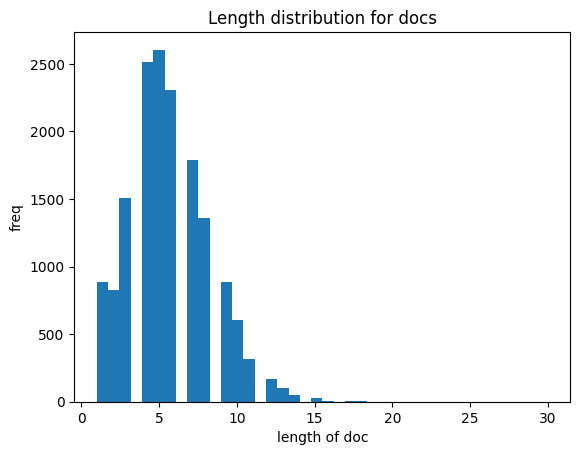

In [10]:
## 文字数の分布
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(raw_df['size'], bins = 40)
ax.set_xlabel('length of doc')
ax.set_ylabel('freq')
plt.title(f"Length distribution for docs")
fig.show()

In [11]:
## 長さで濾過

print(f"max doc size: {max_doc_size}")
original_size = len(raw_df)
raw_df = raw_df[raw_df['size'] < max_doc_size]
filtered_size = len(raw_df)
print(f"{original_size - filtered_size} cases removed")

max doc size: 12
367 cases removed


In [12]:
## 結果の検査 1

for lang in langs:
    print(raw_df[lang].value_counts())

arabic
0    14603
1      995
Name: count, dtype: int64
chinese
0    14598
1     1000
Name: count, dtype: int64
english
1    8249
0    7349
Name: count, dtype: int64
esperanto
0    15598
Name: count, dtype: int64
finnish
0    15598
Name: count, dtype: int64
french
0    13782
1     1816
Name: count, dtype: int64
german
0    14033
1     1565
Name: count, dtype: int64
hungarian
0    15598
Name: count, dtype: int64
icelandic
0    15598
Name: count, dtype: int64
irish
0    15598
Name: count, dtype: int64
italian
0    15598
Name: count, dtype: int64
japanese
0    14598
1     1000
Name: count, dtype: int64
russian
0    14625
1      973
Name: count, dtype: int64
spanish
0    15598
Name: count, dtype: int64
swahili
0    15598
Name: count, dtype: int64
turkish
0    15598
Name: count, dtype: int64


In [13]:
## 結果の検査 2

for type in types:
    print(raw_df[type].value_counts())

spell
1    9878
0    5720
Name: count, dtype: int64
sound
1    11630
0     3968
Name: count, dtype: int64
freq
1.0                14618
1                    966
1 не                   1
1 то время как         1
1 северу               1
1 него                 1
1 будет                1
1 образом              1
1 мышь                 1
Name: count, dtype: int64


In [14]:
## 統合: 割合補正を適用

eng_reduct_factor = 0.2
if balanced:
    eng_df = raw_df[raw_df['english'] == 1]
    non_eng_df = raw_df[raw_df['english'] == 0]
    eng_reduced_df = eng_df.sample(round(len(eng_df) * eng_reduct_factor))
    raw_df = pd.concat([eng_reduced_df, non_eng_df])
raw_df

form  spell  sound freq  arabic  chinese  english  esperanto  \
1157    earlier      1      1  1.0       0        0        1          0   
1748   headache      1      1  1.0       0        0        1          0   
1549       lɛft      0      1    1       0        0        1          0   
1219  encourage      1      1  1.0       0        0        1          0   
2781     petrol      1      1  1.0       0        0        1          0   
...         ...    ...    ...  ...     ...      ...      ...        ...   
995           鼻      1      0    1       0        0        0          0   
996          複数      1      0    1       0        0        0          0   
997          怒り      1      0    1       0        0        0          0   
998          請求      1      0    1       0        0        0          0   
999          大陸      1      0    1       0        0        0          0   

      finnish  french  ...  icelandic  irish  italian  japanese  russian  \
1157        0       0  ...          0      0        0         0        0   
1748        0       0  ...          0      0        0         0        0   
1549        0       0  ...          0      0        0         0        0   
1219        0       0  ...          0      0        0         0        0   
2781        0       0  ...          0      0        0         0        0   
...       ...     ...  ...        ...    ...      ...       ...      ...   
995         0       0  ...          0      0        0         1        0   
996         0       0  ...          0      0        0         1        0   
997         0       0  ...          0      0        0         1        0   
998         0       0  ...          0      0        0         1        0   
999         0       0  ...          0      0        0         1        0   

      spanish  swahili  turkish  size  language  
1157        0        0        0     7   english  
1748        0        0        0     8   english  
1549        0        0        0     4   english  
1219        0        0        0     9   english  
2781        0        0        0     6   english  
...       ...      ...      ...   ...       ...  
995         0        0        0     1  japanese  
996         0        0        0     2  japanese  
997         0        0        0     2  japanese  
998         0        0        0     2  japanese  
999         0        0        0     2  japanese  

[8999 rows x 22 columns]

In [15]:
## データの指定

raw_df = raw_df[raw_df[doc_attr] == 1]
print(f"doc_attr: {doc_attr}")
raw_df

doc_attr: spell


form  spell  sound freq  arabic  chinese  english  esperanto  \
1157     earlier      1      1  1.0       0        0        1          0   
1748    headache      1      1  1.0       0        0        1          0   
1219   encourage      1      1  1.0       0        0        1          0   
2781      petrol      1      1  1.0       0        0        1          0   
3984  understand      1      1  1.0       0        0        1          0   
...          ...    ...    ...  ...     ...      ...      ...        ...   
995            鼻      1      0    1       0        0        0          0   
996           複数      1      0    1       0        0        0          0   
997           怒り      1      0    1       0        0        0          0   
998           請求      1      0    1       0        0        0          0   
999           大陸      1      0    1       0        0        0          0   

      finnish  french  ...  icelandic  irish  italian  japanese  russian  \
1157        0       0  ...          0      0        0         0        0   
1748        0       0  ...          0      0        0         0        0   
1219        0       0  ...          0      0        0         0        0   
2781        0       0  ...          0      0        0         0        0   
3984        0       0  ...          0      0        0         0        0   
...       ...     ...  ...        ...    ...      ...       ...      ...   
995         0       0  ...          0      0        0         1        0   
996         0       0  ...          0      0        0         1        0   
997         0       0  ...          0      0        0         1        0   
998         0       0  ...          0      0        0         1        0   
999         0       0  ...          0      0        0         1        0   

      spanish  swahili  turkish  size  language  
1157        0        0        0     7   english  
1748        0        0        0     8   english  
1219        0        0        0     9   english  
2781        0        0        0     6   english  
3984        0        0        0    10   english  
...       ...      ...      ...   ...       ...  
995         0        0        0     1  japanese  
996         0        0        0     2  japanese  
997         0        0        0     2  japanese  
998         0        0        0     2  japanese  
999         0        0        0     2  japanese  

[6571 rows x 22 columns]

In [16]:
## 結果の検査 3

for lang in langs:
    print(raw_df[lang].value_counts())

arabic
0    5576
1     995
Name: count, dtype: int64
chinese
0    5571
1    1000
Name: count, dtype: int64
english
0    5730
1     841
Name: count, dtype: int64
esperanto
0    6571
Name: count, dtype: int64
finnish
0    6571
Name: count, dtype: int64
french
0    5586
1     985
Name: count, dtype: int64
german
0    5794
1     777
Name: count, dtype: int64
hungarian
0    6571
Name: count, dtype: int64
icelandic
0    6571
Name: count, dtype: int64
irish
0    6571
Name: count, dtype: int64
italian
0    6571
Name: count, dtype: int64
japanese
0    5571
1    1000
Name: count, dtype: int64
russian
0    5598
1     973
Name: count, dtype: int64
spanish
0    6571
Name: count, dtype: int64
swahili
0    6571
Name: count, dtype: int64
turkish
0    6571
Name: count, dtype: int64


# 解析

In [17]:
## 順序のランダマイズし，基本データを決定

import sklearn.utils
df = sklearn.utils.shuffle(raw_df)

In [18]:
## ngram の追加

import sys
sys.path.append('..')

import re
import ngrams
import importlib
importlib.reload(ngrams)
import ngrams_skippy

bases = df[doc_type]

## 1gram 列の追加
#sep = r""
#unigrams = [ list(filter(lambda x: len(x) > 0, y)) for y in [ re.split(sep, z) for z in bases ] ]
unigrams = ngrams.gen_unigrams(bases, sep = r"", check = False)
if verbose:
    random.sample(unigrams, 5)
#
df['1gram'] = unigrams
#df.loc[:,'1gram'] = unigrams
df

form  spell  sound freq  arabic  chinese  english  esperanto  \
431         dur      1      1    1       0        0        0          0   
196           据      1      0    1       0        1        0          0   
282      пример      1      0   1        0        0        0          0   
636      halten      1      1    1       0        0        0          0   
105      allows      1      1  1.0       0        0        1          0   
..          ...    ...    ...  ...     ...      ...      ...        ...   
228  пересекают      1      0   1        0        0        0          0   
181         عدد      1      0  1.0       1        0        0          0   
62         lire      1      1    1       0        0        0          0   
924  expérience      1      1    1       0        0        0          0   
404          罰金      1      0    1       0        0        0          0   

     finnish  french  ...  irish  italian  japanese  russian  spanish  \
431        0       0  ...      0        0         0        0        0   
196        0       0  ...      0        0         0        0        0   
282        0       0  ...      0        0         0        1        0   
636        0       0  ...      0        0         0        0        0   
105        0       0  ...      0        0         0        0        0   
..       ...     ...  ...    ...      ...       ...      ...      ...   
228        0       0  ...      0        0         0        1        0   
181        0       0  ...      0        0         0        0        0   
62         0       1  ...      0        0         0        0        0   
924        0       1  ...      0        0         0        0        0   
404        0       0  ...      0        0         1        0        0   

     swahili  turkish  size  language                           1gram  
431        0        0     3    german                       [d, u, r]  
196        0        0     1   chinese                             [据]  
282        0        0     6   russian              [п, р, и, м, е, р]  
636        0        0     6    german              [h, a, l, t, e, n]  
105        0        0     6   english              [a, l, l, o, w, s]  
..       ...      ...   ...       ...                             ...  
228        0        0    10   russian  [п, е, р, е, с, е, к, а, ю, т]  
181        0        0     3    arabic                       [ع, د, د]  
62         0        0     4    french                    [l, i, r, e]  
924        0        0    10    french  [e, x, p, é, r, i, e, n, c, e]  
404        0        0     2  japanese                          [罰, 金]  

[6571 rows x 23 columns]

In [19]:
## 2gram列の追加

bigrams = ngrams.gen_bigrams(bases, sep = r"", check = False)

## 包括的 2gram の作成
if ngram_is_inclusive:
    bigrams = [ [*b, *u] for b, u in zip(bigrams, unigrams) ]

if verbose:
    print(random.sample(bigrams, 3))

In [20]:
df['2gram'] = bigrams
if verbose:
    df

In [21]:
## 3gram列の追加

trigrams = ngrams.gen_trigrams(bases, sep = r"", check = False)

## 包括的 3gram の作成
if ngram_is_inclusive:
    trigrams = [ [ *t, *b ] for t, b in  zip(trigrams, bigrams) ]

if verbose:
    print(random.sample(trigrams, 3))

In [22]:
df['3gram'] = trigrams
if verbose:
    df

In [23]:
## skippy 2grams の生成

import sys
sys.path.append("..") # library path に一つ上の階層を追加

import ngrams_skippy

skippy_2grams = [ ngrams_skippy.generate_skippy_bigrams(x,
                                                         missing_mark = '…',
                                                         max_distance = max_distance_val, check = False)
                  for x in df['1gram'] ]

## 包括的 skippy 2-grams の生成
if ngram_is_inclusive:
    for i, b2 in enumerate(skippy_2grams):
        b2.extend(unigrams[i])
#
if verbose:
    random.sample(skippy_2grams, 3)

In [24]:
## skippy 2gram 列の追加

df['skippy2gram'] = skippy_2grams
df

form  spell  sound freq  arabic  chinese  english  esperanto  \
431         dur      1      1    1       0        0        0          0   
196           据      1      0    1       0        1        0          0   
282      пример      1      0   1        0        0        0          0   
636      halten      1      1    1       0        0        0          0   
105      allows      1      1  1.0       0        0        1          0   
..          ...    ...    ...  ...     ...      ...      ...        ...   
228  пересекают      1      0   1        0        0        0          0   
181         عدد      1      0  1.0       1        0        0          0   
62         lire      1      1    1       0        0        0          0   
924  expérience      1      1    1       0        0        0          0   
404          罰金      1      0    1       0        0        0          0   

     finnish  french  ...  russian  spanish  swahili  turkish  size  language  \
431        0       0  ...        0        0        0        0     3    german   
196        0       0  ...        0        0        0        0     1   chinese   
282        0       0  ...        1        0        0        0     6   russian   
636        0       0  ...        0        0        0        0     6    german   
105        0       0  ...        0        0        0        0     6   english   
..       ...     ...  ...      ...      ...      ...      ...   ...       ...   
228        0       0  ...        1        0        0        0    10   russian   
181        0       0  ...        0        0        0        0     3    arabic   
62         0       1  ...        0        0        0        0     4    french   
924        0       1  ...        0        0        0        0    10    french   
404        0       0  ...        0        0        0        0     2  japanese   

                              1gram  \
431                       [d, u, r]   
196                             [据]   
282              [п, р, и, м, е, р]   
636              [h, a, l, t, e, n]   
105              [a, l, l, o, w, s]   
..                              ...   
228  [п, е, р, е, с, е, к, а, ю, т]   
181                       [ع, د, د]   
62                     [l, i, r, e]   
924  [e, x, p, é, r, i, e, n, c, e]   
404                          [罰, 金]   

                                                 2gram  \
431                                  [du, ur, d, u, r]   
196                                             [据, 据]   
282             [пр, ри, им, ме, ер, п, р, и, м, е, р]   
636             [ha, al, lt, te, en, h, a, l, t, e, n]   
105             [al, ll, lo, ow, ws, a, l, l, o, w, s]   
..                                                 ...   
228  [пе, ер, ре, ес, се, ек, ка, аю, ют, п, е, р, ...   
181                                  [عد, دد, ع, د, د]   
62                            [li, ir, re, l, i, r, e]   
924  [ex, xp, pé, ér, ri, ie, en, nc, ce, e, x, p, ...   
404                                         [罰金, 罰, 金]   

                                                 3gram  \
431                             [dur, du, ur, d, u, r]   
196                                          [据, 据, 据]   
282  [при, рим, име, мер, пр, ри, им, ме, ер, п, р,...   
636  [hal, alt, lte, ten, ha, al, lt, te, en, h, a,...   
105  [all, llo, low, ows, al, ll, lo, ow, ws, a, l,...   
..                                                 ...   
228  [пер, ере, рес, есе, сек, ека, каю, ают, пе, е...   
181                             [عدد, عد, دد, ع, د, د]   
62                  [lir, ire, li, ir, re, l, i, r, e]   
924  [exp, xpé, pér, éri, rie, ien, enc, nce, ex, x...   
404                                   [罰, 金, 罰金, 罰, 金]   

                                           skippy2gram  
431                             [du, d…r, ur, d, u, r]  
196                                             [据, 据]  
282  [пр, п…и, п…м, п…е, п…р, ри, р…м, р…е, р…р, им...  
636  [ha, h…l, h…t, h…e, h…n, al, a…t, a…e, a…

In [25]:
## skippy 3grams の生成

#import sys
#sys.path.append("..") # library path に一つ上の階層を追加

import ngrams_skippy

skippy_3grams = [ ngrams_skippy.generate_skippy_trigrams(x,
                                                         missing_mark = '…',
                                                         max_distance = max_distance_val, check = False)
                  for x in df['1gram'] ]

## 包括的 skippy 3-grams の生成
if ngram_is_inclusive:
    for i, t2 in enumerate(skippy_3grams):
        t2.extend(skippy_2grams[i])
#
if verbose:
    random.sample(skippy_3grams, 3)

In [26]:
## skippy 3gram 列の追加

df['skippy3gram'] = skippy_3grams
df

form  spell  sound freq  arabic  chinese  english  esperanto  \
431         dur      1      1    1       0        0        0          0   
196           据      1      0    1       0        1        0          0   
282      пример      1      0   1        0        0        0          0   
636      halten      1      1    1       0        0        0          0   
105      allows      1      1  1.0       0        0        1          0   
..          ...    ...    ...  ...     ...      ...      ...        ...   
228  пересекают      1      0   1        0        0        0          0   
181         عدد      1      0  1.0       1        0        0          0   
62         lire      1      1    1       0        0        0          0   
924  expérience      1      1    1       0        0        0          0   
404          罰金      1      0    1       0        0        0          0   

     finnish  french  ...  spanish  swahili  turkish  size  language  \
431        0       0  ...        0        0        0     3    german   
196        0       0  ...        0        0        0     1   chinese   
282        0       0  ...        0        0        0     6   russian   
636        0       0  ...        0        0        0     6    german   
105        0       0  ...        0        0        0     6   english   
..       ...     ...  ...      ...      ...      ...   ...       ...   
228        0       0  ...        0        0        0    10   russian   
181        0       0  ...        0        0        0     3    arabic   
62         0       1  ...        0        0        0     4    french   
924        0       1  ...        0        0        0    10    french   
404        0       0  ...        0        0        0     2  japanese   

                              1gram  \
431                       [d, u, r]   
196                             [据]   
282              [п, р, и, м, е, р]   
636              [h, a, l, t, e, n]   
105              [a, l, l, o, w, s]   
..                              ...   
228  [п, е, р, е, с, е, к, а, ю, т]   
181                       [ع, د, د]   
62                     [l, i, r, e]   
924  [e, x, p, é, r, i, e, n, c, e]   
404                          [罰, 金]   

                                                 2gram  \
431                                  [du, ur, d, u, r]   
196                                             [据, 据]   
282             [пр, ри, им, ме, ер, п, р, и, м, е, р]   
636             [ha, al, lt, te, en, h, a, l, t, e, n]   
105             [al, ll, lo, ow, ws, a, l, l, o, w, s]   
..                                                 ...   
228  [пе, ер, ре, ес, се, ек, ка, аю, ют, п, е, р, ...   
181                                  [عد, دد, ع, د, د]   
62                            [li, ir, re, l, i, r, e]   
924  [ex, xp, pé, ér, ri, ie, en, nc, ce, e, x, p, ...   
404                                         [罰金, 罰, 金]   

                                                 3gram  \
431                             [dur, du, ur, d, u, r]   
196                                          [据, 据, 据]   
282  [при, рим, име, мер, пр, ри, им, ме, ер, п, р,...   
636  [hal, alt, lte, ten, ha, al, lt, te, en, h, a,...   
105  [all, llo, low, ows, al, ll, lo, ow, ws, a, l,...   
..                                                 ...   
228  [пер, ере, рес, есе, сек, ека, каю, ают, пе, е...   
181                             [عدد, عد, دد, ع, د, د]   
62                  [lir, ire, li, ir, re, l, i, r, e]   
924  [exp, xpé, pér, éri, rie, ien, enc, nce, ex, x...   
404                                   [罰, 金, 罰金, 罰, 金]   

                                           skippy2gram  \
431                             [du, d…r, ur, d, u, r]   
196                                             [据, 据]   
282  [пр, п…и, п…м, п…е, п…р, ри, р…м, р…е, р…р, им...   
636  [ha, h…l, h…t, h…e, h…n, al, a…t, a…e, a…n, lt...   
105  [al, a…l, a…o, a…w, a…s, ll, l…o, l…w, l…s, lo...   
..                                

In [27]:
## LDA 構築の基になる document-term matrix (dtm) を構築

from gensim.corpora.dictionary import Dictionary

bots = df[term_type]
diction = Dictionary(bots)

## 結果の確認
print(diction)

Dictionary<1375 unique tokens: ['d', 'r', 'u', '据', 'е']...>


In [28]:
## diction の濾過

import copy
diction_copy = copy.deepcopy(diction)

## filter適用: 実は諸刃の刃で，token数が少ない時には適用しない方が良い
print(f"min freq filter: {term_min_freq}")
print(f"abuse filter: {term_abuse_threshold}")

apply_filter = True
if apply_filter:
    diction_copy.filter_extremes(no_below = term_min_freq, no_above = term_abuse_threshold)

## check
print(diction_copy)

min freq filter: 2
abuse filter: 0.04
Dictionary<608 unique tokens: ['м', 'п', 'w', '了', '解']...>


In [29]:
## Corpus (gensim の用語では corpus) の構築

corpus = [ diction.doc2bow(bot) for bot in bots ]

## check
check = True
if verbose:
    sample_n = 5
    print(random.sample(corpus, sample_n))
#
print(f"Number of documents: {len(corpus)}")

Number of documents: 6571


In [30]:
## LDA モデルの構築

from gensim.models import LdaModel
#from tqdm import tqdm

## LDAモデル
print(f"Building LDA model with n_topics: {n_topics}")
lda = LdaModel(corpus, id2word = diction, num_topics = n_topics, alpha = 0.01)
#
print(lda) # print(..)しないと中身が見れない

Building LDA model with n_topics: 15
LdaModel<num_terms=1375, num_topics=15, decay=0.5, chunksize=2000>


In [31]:
%%capture --no-display

## LDA のtopic ごとに，関連度の高い term を表示

import pandas as pd

n_terms = 20 # topic ごとに表示する term 数の指定
topic_dfs = [ ]
for topic in range(n_topics):
    terms = [ ]
    for i, prob in lda.get_topic_terms(topic, topn = n_terms):
        terms.append(diction.id2token[ int(i) ])
    #
    topic_dfs.append(pd.DataFrame([terms], index = [ f'topic {topic+1}' ]))
#
topic_term_df = pd.concat(topic_dfs)

## Table で表示
topic_term_df.T

topic 1 topic 2 topic 3 topic 4 topic 5 topic 6 topic 7 topic 8 topic 9  \
0        а       j       e       た       о       e       é       ي       る   
1        т       グ       n       っ       е       さ       c       ن       l   
2        ь       ー       r       て       н       r       e       ر       ä   
3        с       ン       c       い       л               o       ف       す   
4        р       う       t       z       р       x       n       م       要   
5        и       し       o       ф       т       間       t       ق       一   
6        к       e       u       a       с       人       ü       ح       方   
7        н       く       h       に       и       全       k       ص       e   
8        у       シ       s       т       а       ا       r       ة       分   
9        о       ル       i       t       в       t       i       ا       i   
10       з       り       a       見       д       士       ロ       و       上   
11       м       に       g       n       п       数       l       د       因   
12       в       地       d       s       к       d       m       ل       目   
13       ч       か       l       前       м       i       p       ه       形   
14       е       ブ       m       e       ь       ل       ー       ط       f   
15       不       ト       w       o       й       u       有       ت       u   
16       б       子       b       る       ы       s       d       s       事   
17       д       了       p       r       б       ص       ズ       ك       下   
18       ж       ラ       z       о       я       a       リ       ئ       r   
19       п       よ       f       え       г       b       ô       死       m   

   topic 10 topic 11 topic 12 topic 13 topic 14 topic 15  
0         e        ا        a        i        の        ー  
1         r        ل        n        t        そ        ン  
2         s        م        d        e        た        ス  
3         a        ر        e        f        喜        خ  
4         i        ب        l        n        だ        ト  
5         m        ت        b        a        ф        い  
6         o        ة        g        d        ث        ル  
7         l        ي        t        l        明        ク  
8         n        ع        s        r        ま        ه  
9         p        س        パ        s        ム        イ  
10        t        د        r        o        最        ذ  
11        v        ق        な        p        起        ف  
12        g        ج        i        c        テ        ラ  
13        u        و        意        h        由        サ  
14        b        ن        u        g        長        ッ  
15        y        ش        c        u        د        ア  
16        d        أ        î        m        安        フ  
17        é        ك        v        k        球        プ  
18        c        ح        很        y        れ        ا  
19        k        ز        以        z        こ        ث

In [32]:
%%capture --no-display

## pyLDAvis を使った結果 LDA の可視化: 階層クラスタリングより詳しい

import pyLDAvis

#installed_version = sys.version
installed_version = pyLDAvis.__version__

print(f"installed_version: {installed_version}")

if float(installed_version[:3]) > 3.1:
    import pyLDAvis.gensim_models as gensimvis
else:
    import pyLDAvis.gensim as gensimvis
#
pyLDAvis.enable_notebook()

#
lda_used     = lda
corpus_used  = corpus
diction_used = diction

## 実行パラメター
use_tSNE = False
if use_tSNE:
    vis = gensimvis.prepare(lda_used, corpus_used, diction_used, mds = 'tsne',
                            n_jobs = 1, sort_topics = False)
else:
    vis = gensimvis.prepare(lda_used, corpus_used, diction_used,
                            n_jobs = 1, sort_topics = False)
#
pyLDAvis.display(vis)

## 結果について
## topic を表わす円の重なりが多いならn_topics が多過ぎる可能性がある．
## ただし2Dで重なっていても，3Dなら重なっていない可能性もある

In [33]:
## LDA がD に対して生成した topics の弁別性を確認

## 得られたtopics を確認
topic_dist = lda.get_topics()
if verbose:
    topic_dist

In [34]:
## 検査 1: topic ごとに分布の和を取る

print(topic_dist.sum(axis = 1))

[0.99999994 0.99999994 1.0000001  0.99999994 1.         1.
 1.0000001  1.0000001  1.         1.0000001  0.9999998  1.0000001
 0.99999994 1.         1.        ]


In [35]:
## 検査 2: 総和を求める: n_topics にほぼ等しいなら正常

print(topic_dist.sum())

15.0


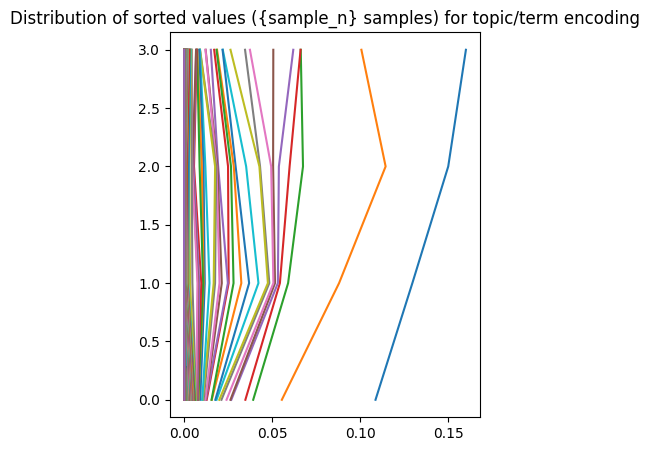

In [36]:
## term エンコード値の分布を確認

import matplotlib.pyplot as plt

plt.figure(figsize = (4,5))

sampling_rate = 0.3
df_size = len(topic_dist)
sample_n = round(df_size * sampling_rate)
topic_sampled = random.sample(list(topic_dist), sample_n)

T = sorted([ sorted(x, reverse = True) for x in topic_sampled ])

plt.plot(T, range(len(T)))
plt.title("Distribution of sorted values ({sample_n} samples) for topic/term encoding")
plt.show()

In [37]:
## tSNE を使った topics のグループ化 (3D)

from sklearn.manifold import TSNE
import numpy as np

## tSNE のパラメターを設定
## n_components は射影先の空間の次元: n_components = 3 なら3次元空間に射影
## perplexity は結合の強さを表わす指数で，値に拠って結果が代わるので，色々な値を試すと良い

#perplexity_val = 10 # 大き過ぎると良くない
top_perplexity_reduct_rate = 0.3
perplexity_val = round(len(topic_dist) * top_perplexity_reduct_rate)
topic_tSNE_3d = TSNE(n_components = 3, random_state = 0, perplexity = perplexity_val, n_iter = 1000)

## データに適用
top_tSNE_3d_fitted = topic_tSNE_3d.fit_transform(np.array(topic_dist))

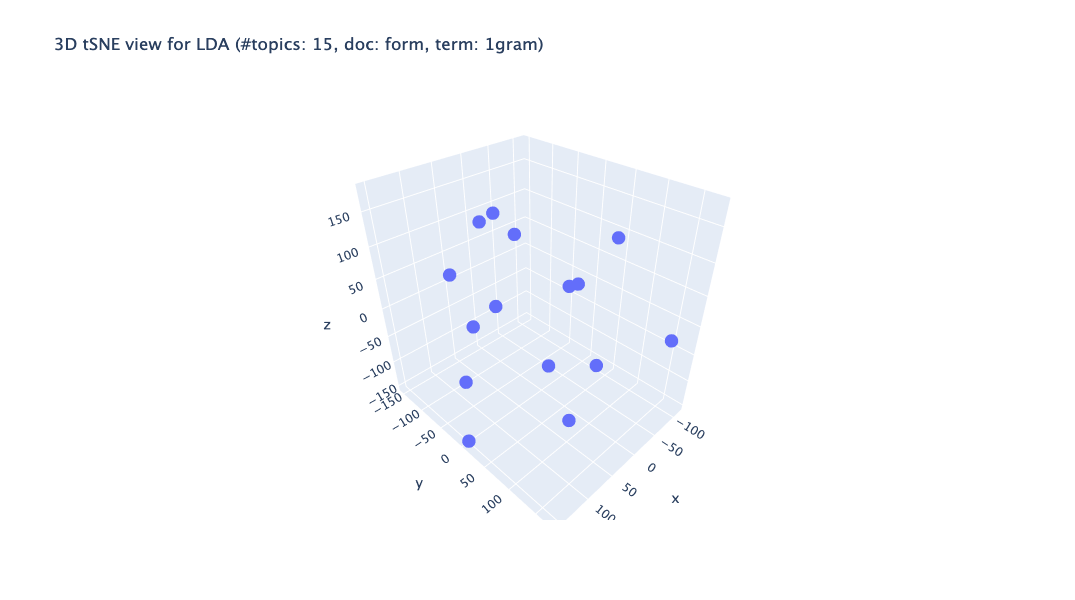

In [38]:
## Plotlyを使って tSNE の結果の可視化 (3D)

#import plotly.express as pex
import plotly.graph_objects as go
import numpy as np

top_tSNE = top_tSNE_3d_fitted
fig = go.Figure(data = [go.Scatter3d(x = top_tSNE[:,0], y = top_tSNE[:,1], z = top_tSNE[:,2],
                                     mode = 'markers')])

## 3D 散布図にラベルを追加する処理は未実装
title_val = f"3D tSNE view for LDA (#topics: {n_topics}, doc: {doc_type}, term: {term_type})"
fig.update_layout(autosize = False,
                  width = 600, height = 600, title = title_val)
fig.show()

In [39]:
## 構築した LDA モデルを使って文(書)を分類する

## .get_document_topics(..) は　minimu_probability = 0としないと
## topic の値が小さい場合に値を返さないので，

## パラメター

ntopics = n_topics # LDA の構築の最に指定した値を使う

check      = False
encoding = [ ]
for i, row in df.iterrows():
    if check:
        print(f"row: {row}")
    doc = row[doc_type]
    bot = row[term_type]
    ## get_document_topics(..) では　minimu_probability = 0 としないと
    ## 値が十分に大きな topics に関してだけ値が取れる
    enc = lda.get_document_topics(diction.doc2bow(bot), minimum_probability = 0)
    if check:
        print(f"enc: {enc}")
    encoding.append(enc)
#
len(encoding)

6571

In [40]:
## enc 列の追加

#df['enc'] = np.array(encoding) # This flattens arrays
#df['enc'] = list(encoding) # ineffective
df['enc'] = [ list(map(lambda x: x[1], y)) for y in encoding ]
if verbose:
    df['enc']

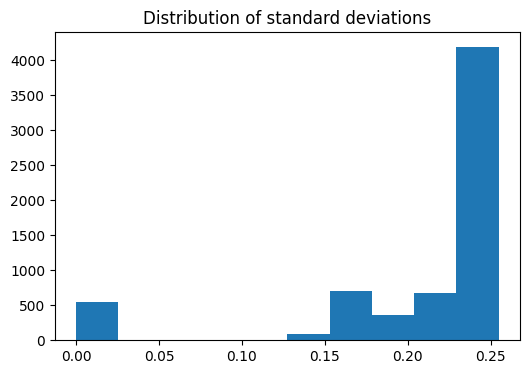

In [41]:
## エンコーディングのstd の分布を見る

from scipy.stats import tstd
from matplotlib import pyplot as plt

plt.figure(figsize = (6,4))

std_data = [ tstd(x) for x in df['enc'] ]
plt.hist(std_data)

plt.title("Distribution of standard deviations")
plt.show()

In [42]:
## doc のエンコーディング

## 一様分布の事例を除外

from scipy.stats import tstd # standard deviation の計算用

print(f"{len(df)} instances before filtering")

check = False

doc_enc = df['enc']
max_std = max([ tstd(x) for x in doc_enc])
if check: print(f"std max: {max_std}")

min_std = min([ tstd(x) for x in doc_enc])
if check: print(f"std min: {min_std}")

first_min_std = list(sorted(set([ tstd(x) for x in doc_enc])))[-0]
print(f"std 1st min: {first_min_std}")

second_min_std = list(sorted(set([ tstd(x) for x in doc_enc])))[-1]
print(f"std 2nd min: {second_min_std}")

6571 instances before filtering
std 1st min: 0.0
std 2nd min: 0.25472535595616774


In [43]:
## df_filtered の定義

## 閾値は2番目に小さい値より小さく最小値よりは大きな値であるべき
std_threshold = second_min_std / 4 # 穏健な値を得るために4で割った
print(f"std_threshold: {std_threshold}")

## Rっぽい次のコードは通らない
#df_filtered = df[ df['encoding'] > std_threshold ]

## 通るのは次のコード: Creating a list of True/False and apply it to DataFrame 
std_tested = [ False if tstd(x) < std_threshold else True for x in df['enc'] ]
df_filtered = df[ std_tested ]
#
print(f"{len(df_filtered)} instances after filtering ({len(df) - len(df_filtered)} instances removed)")

std_threshold: 0.06368133898904194
6025 instances after filtering (546 instances removed)


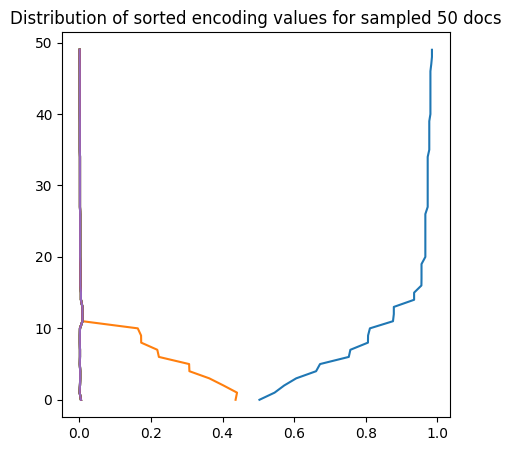

In [44]:
## doc エンコード値の分布を確認

sample_n = 50
E = sorted([ sorted(x, reverse = True) for x in df_filtered['enc'].sample(sample_n) ])

plt.figure(figsize = (5,5))
plt.plot(E, range(len(E)))
plt.title(f"Distribution of sorted encoding values for sampled {sample_n} docs")
plt.show()

In [45]:
len(df_filtered['language'])

6025

In [46]:
df_filtered['language'].value_counts

<bound method IndexOpsMixin.value_counts of 431      german
282     russian
636      german
105     english
552     chinese
         ...   
3371    english
228     russian
181      arabic
62       french
924      french
Name: language, Length: 6025, dtype: object>

In [47]:
## tSNE 用の事例サンプリング = tSNE_df の定義

tSNE_sampling = True
tSNE_sampling_rate = 0.33
if tSNE_sampling:
    tSNE_df_original = df_filtered.copy()
    sample_n = round(len(tSNE_df_original) * tSNE_sampling_rate)
    tSNE_df = tSNE_df_original.sample(sample_n)
    print(f"tSNE_df has {len(tSNE_df)} rows after sampling")
else:
    tSNE_df = df_filtered

tSNE_df has 1988 rows after sampling


In [48]:
tSNE_df.columns

Index(['form', 'spell', 'sound', 'freq', 'arabic', 'chinese', 'english',
       'esperanto', 'finnish', 'french', 'german', 'hungarian', 'icelandic',
       'irish', 'italian', 'japanese', 'russian', 'spanish', 'swahili',
       'turkish', 'size', 'language', '1gram', '2gram', '3gram', 'skippy2gram',
       'skippy3gram', 'enc'],
      dtype='object')

In [49]:
tSNE_df['language'].value_counts

<bound method IndexOpsMixin.value_counts of 365      german
513     chinese
615      german
341      arabic
639      arabic
         ...   
414      arabic
510     russian
618     chinese
2054    english
523     russian
Name: language, Length: 1988, dtype: object>

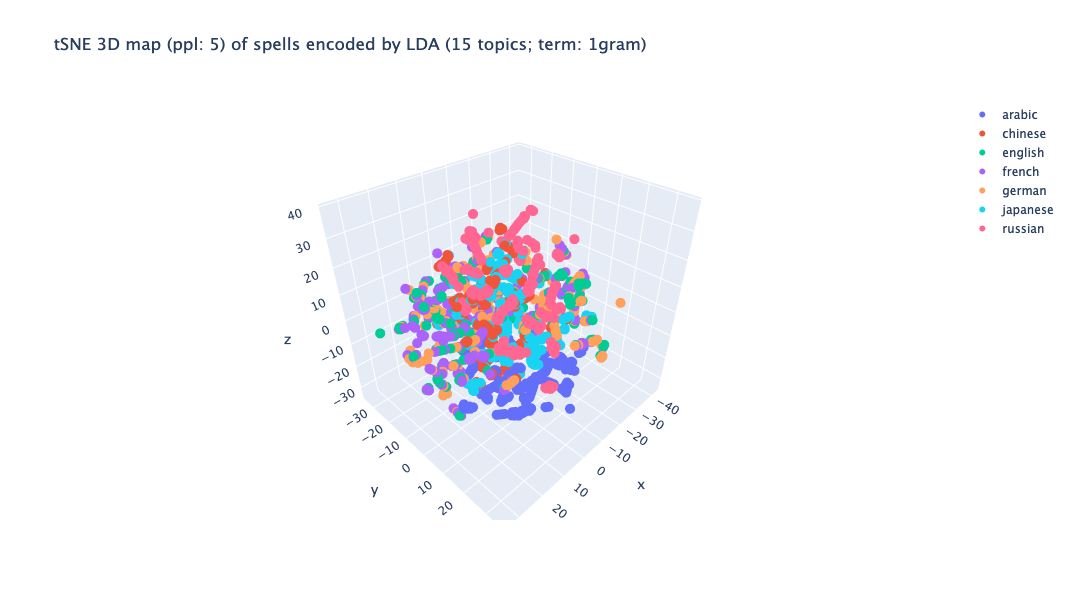

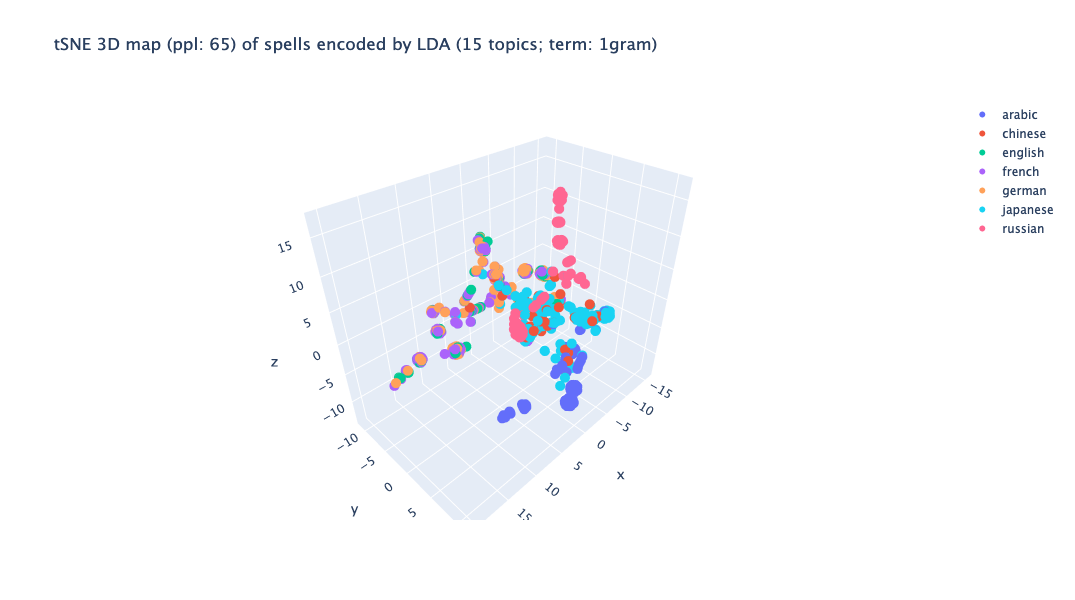

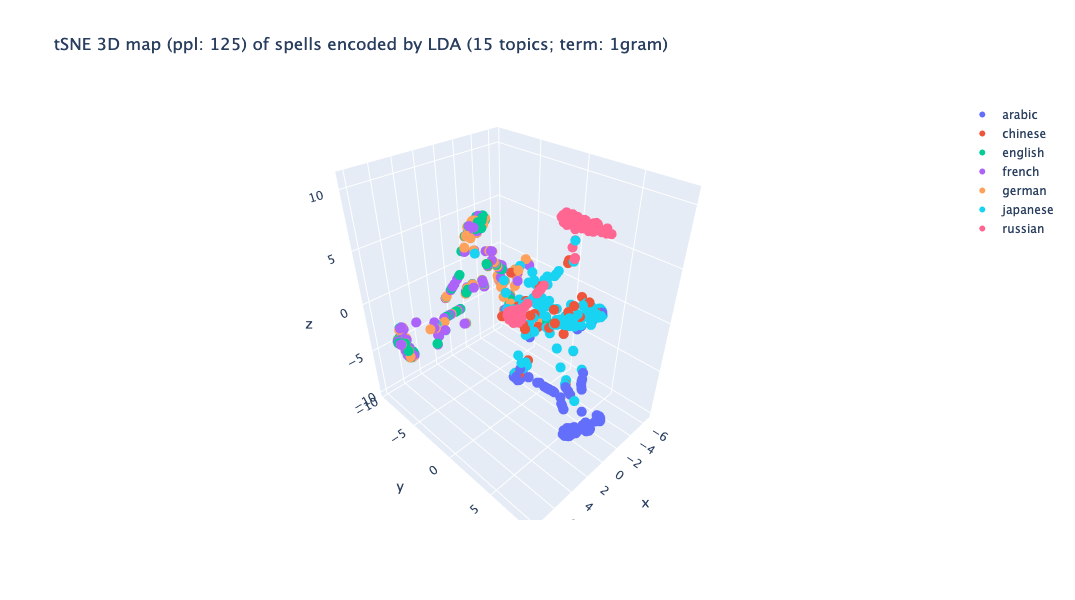

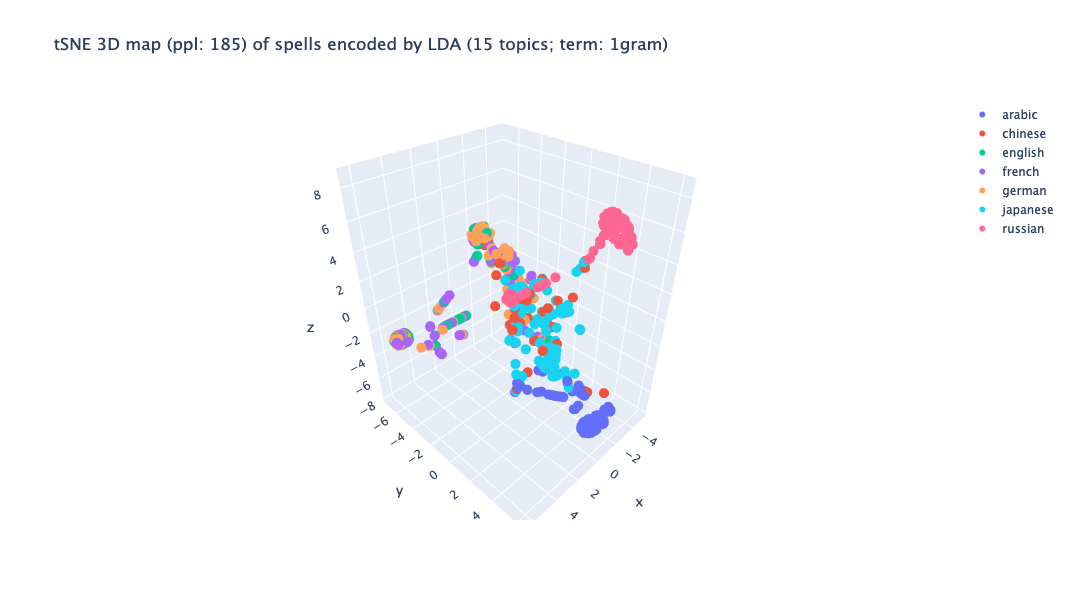

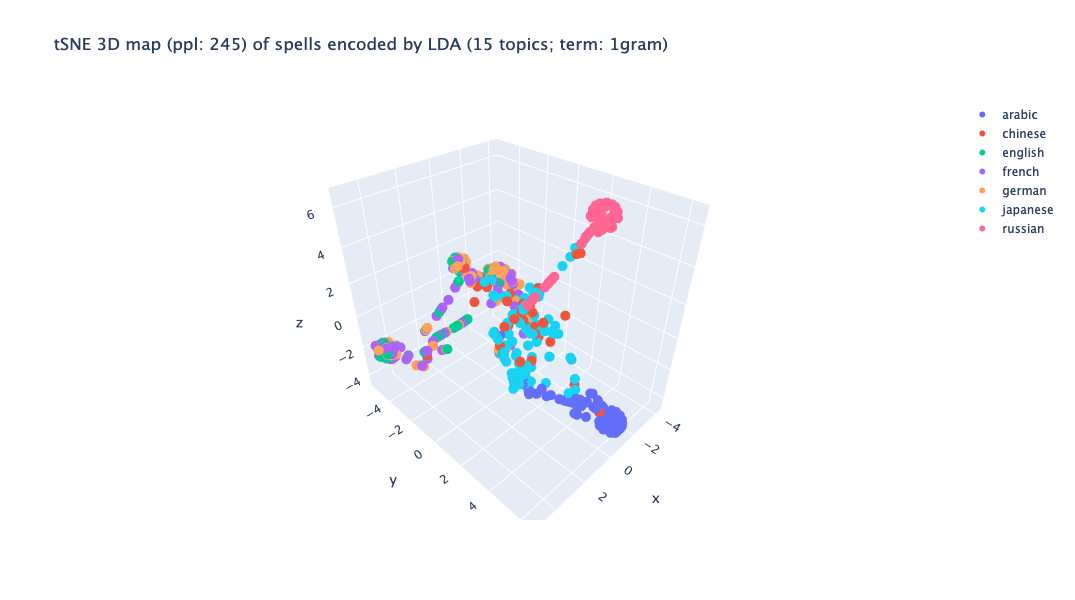

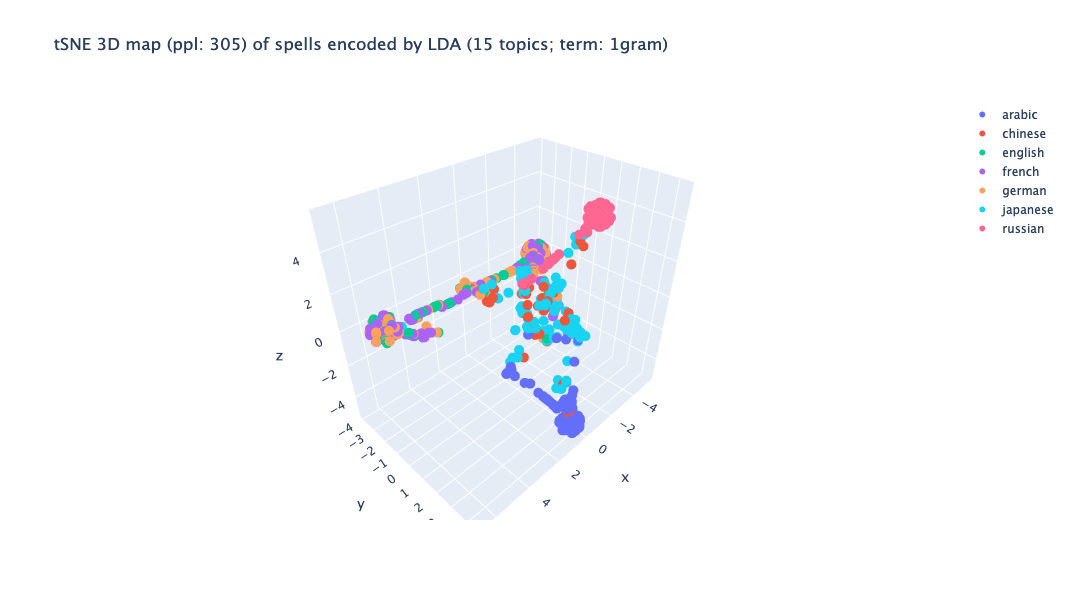

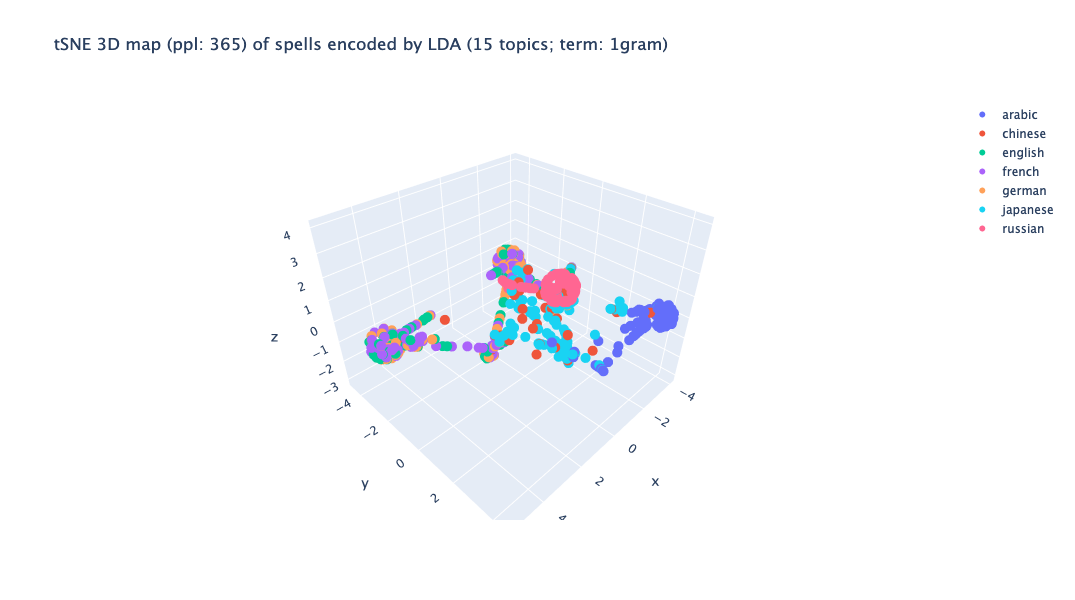

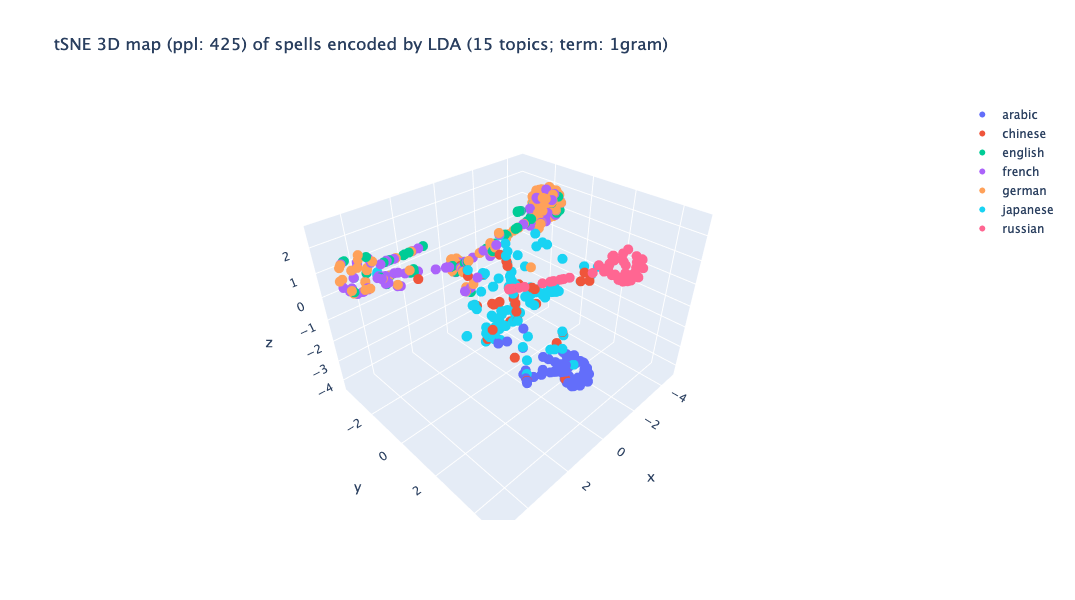

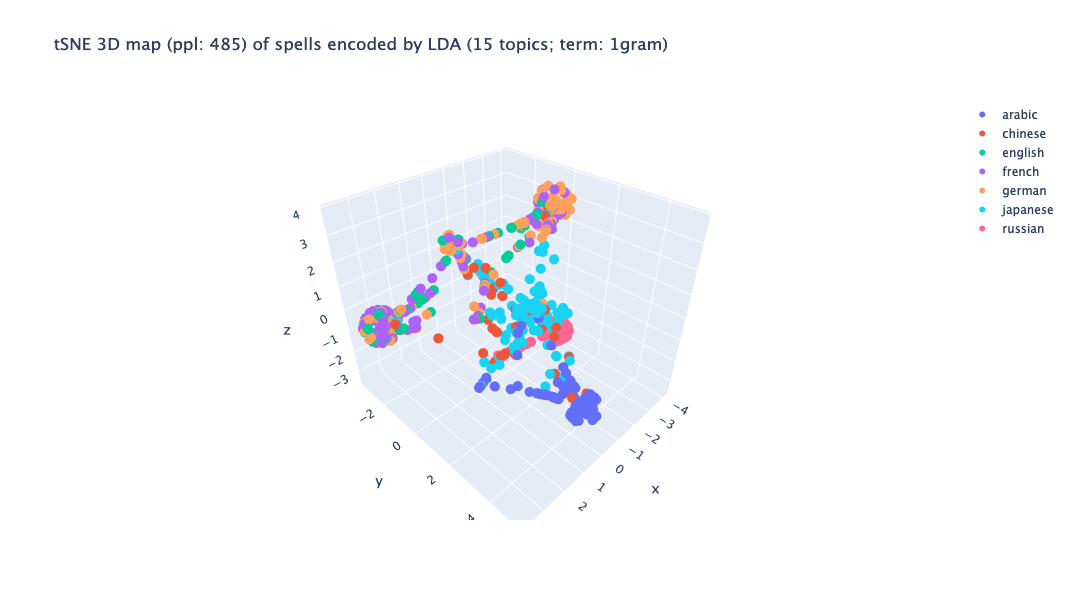

In [50]:
## tSNE の結果の可視化: Plotly を使った 3D 描画

import numpy as np
from sklearn.manifold import TSNE as tSNE

import plotly.express as pex
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## tSNE のパラメターを設定

perplexity_max_val = round(len(tSNE_df)/4)

for perplexity_val in range(5, perplexity_max_val, 60):
    
    ## tSNE 事例の生成
    tSNE_3d_varied = tSNE(n_components = 3, random_state = 0, perplexity = perplexity_val, n_iter = 1000)

    ## データに適用
    doc_enc = np.array(list(tSNE_df['enc']))
    doc_tSNE_3d_varied = tSNE_3d_varied.fit_transform(doc_enc)

    T = zip(doc_tSNE_3d_varied[:,0], doc_tSNE_3d_varied[:,1], doc_tSNE_3d_varied[:,2],
            tSNE_df['language']) # zip(..)が必要
    df = pd.DataFrame(T, columns = ['D1', 'D2', 'D3', 'language'])

    ## 作図
    fig = go.Figure()
    for lang in np.unique(df['language']):
        part = df[df['language'] == lang]
        fig.add_trace(
            go.Scatter3d(
                x = part['D1'], y = part['D2'], z = part['D3'],
                name = lang, mode = 'markers', marker = dict(size = 6),
                showlegend = True
            )
        )

    title_val = f"tSNE 3D map (ppl: {perplexity_val}) of {doc_attr}s encoded by LDA ({n_topics} topics; term: {term_type})"
    fig.update_layout(title = dict(text = title_val),
                      autosize = False, width = 600, height = 600,)
    fig.show()

In [51]:
## 階層クラスタリングのための事例のサンプリング

hc_sampling_rate = 0.1 # 大きくし過ぎると図が見にくい
df_size = len(tSNE_df)
hc_sample_n = round(df_size * hc_sampling_rate)
hc_df = tSNE_df.sample(hc_sample_n)
##
print(f"{hc_sample_n} rows are sampled")
hc_df['language'].value_counts()

199 rows are sampled


language
russian     36
french      35
arabic      32
english     30
german      27
japanese    25
chinese     14
Name: count, dtype: int64

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 35613 (\N{CJK UNIFIED IDEOGRAPH-8B1D}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 30722 (\N{CJK UNIFIED IDEOGRAPH-7802}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 27888 (\N{CJK UNIFIED IDEOGRAPH-6CF0}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 36866 (\N{CJK UNIFIED IDEOGRAPH-9002}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 36814 (\N{CJK UNIFIED I

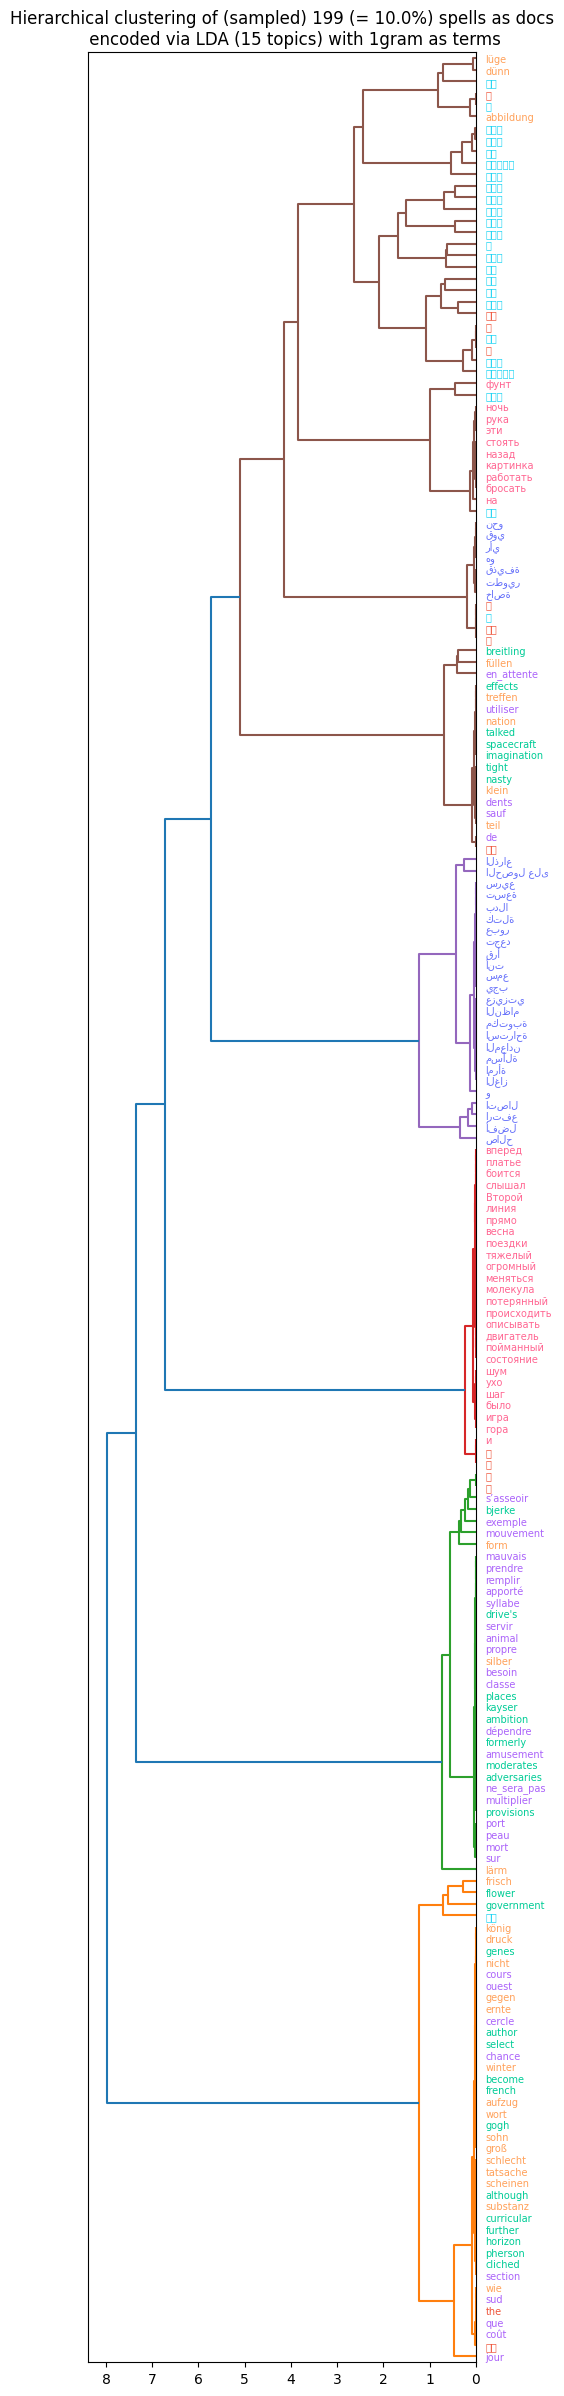

In [52]:
## doc 階層クラスタリングの実行

import numpy as np
import plotly
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

## 距離行列の生成
Enc = list(hc_df['enc'])
linkage = linkage(Enc, method = 'ward', metric = 'euclidean')

## 描画サイズの指定
plt.figure(figsize = (5, round(len(hc_df) * 0.15))) # This needs to be run here, before dendrogram construction.

## 事例ラベルの生成
label_vals = [ x[:max_doc_size] for x in list(hc_df[doc_type]) ] # truncate doc keys

## 樹状分岐図の作成
dendrogram(linkage, orientation = 'left', labels = label_vals, leaf_font_size = 7)

## 描画
plt.title(f"Hierarchical clustering of (sampled) {len(hc_df)} (= {100 * hc_sampling_rate}%) {doc_attr}s as docs\n \
    encoded via LDA ({n_topics} topics) with {term_type} as terms")

## ラベルに language に対応する色を付ける
lang_colors = { lang_name : i for i, lang_name in enumerate(np.unique(hc_df['language'])) }
ax = plt.gca()
for ticker in ax.get_ymajorticklabels():
    form = ticker.get_text()
    row = hc_df.loc[hc_df[doc_type] == form]
    #lang = row['language']
    lang = row['language'].to_string().split()[-1] # trick
    try:
        lang_id = lang_colors[lang]
    except (TypeError, KeyError):
        print(f"color encoding error at: {lang}")
    #
    ticker.set_color(plotly.colors.qualitative.Plotly[lang_id]) # id の基数調整
#
plt.show()

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12393 (\N{HIRAGANA LETTER DO}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12418 (\N{HIRAGANA LETTER MO}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12496 (\N{KATAKANA LETTER BA}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.



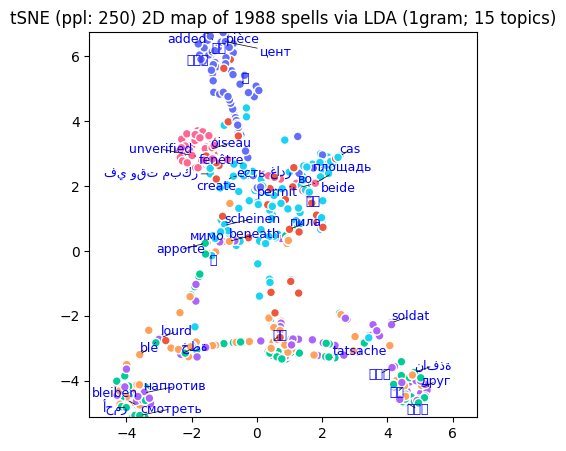

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 37027 (\N{CJK UNIFIED IDEOGRAPH-90A3}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 12493 (\N{KATAKANA LETTER NE}) missing from current font.

/Vol

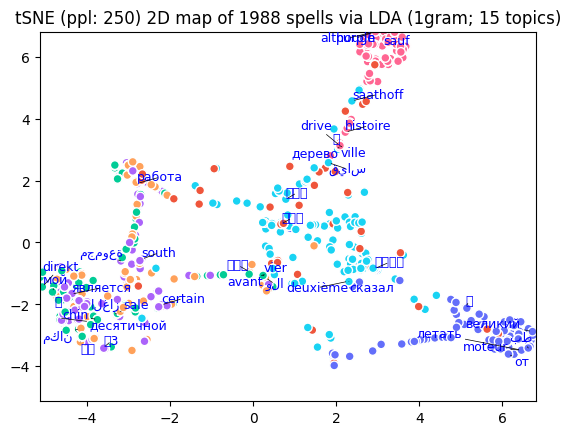

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 31348 (\N{CJK UNIFIED IDEOGRAPH-7A74}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 23565 (\N{CJK UNIFIED IDEOGRAPH-5C0D}) missing from current font.

/Volumes/K/opt/miniconda3/lib/python3.10/site-packages/adjustText/__init__.py:564: UserWarning:

Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing 

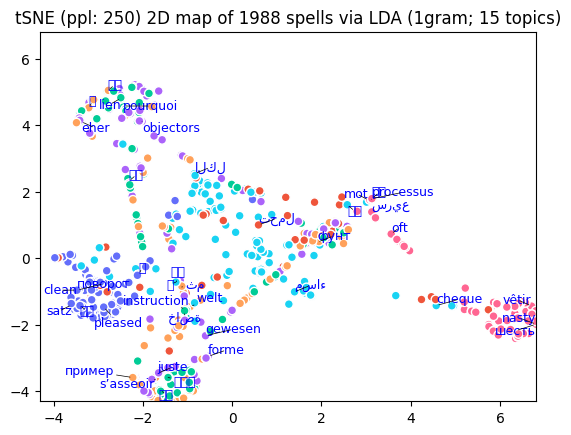

In [53]:
## tSNE の結果の可視化 (2D)

#import seaborn as sns
import numpy as np
import plotly
import plotly.express as pex
import matplotlib.pyplot as plt
from adjustText import adjust_text

## tSNE 事例の生成
perplexity_selected = 250
tSNE_3d = tSNE(n_components = 3, random_state = 0, perplexity = perplexity_selected, n_iter = 1000)

## データに適用
doc_enc = np.array(list(tSNE_df['enc']))
doc_tSNE_3d = tSNE_3d.fit_transform(doc_enc)

T = zip(doc_tSNE_3d[:,0], doc_tSNE_3d[:,1], doc_tSNE_3d[:,2],
        tSNE_df['language']) # zip(..)が必要
df = pd.DataFrame(T, columns = ['D1', 'D2', 'D3', 'language'])

## 描画
plt.figure(figsize = (5, 5))
plt.set_colors = pex.colors.qualitative.Plotly
    
for r in [ np.roll([0,1,2], -i) for i in range(0,3) ]:
    if check:
        print(r)
    X, Y = df.iloc[:,r[0]], df.iloc[:,r[1]]
    gmax = max(X.max(), Y.max())
    gmin = min(X.min(), Y.min())
    plt.xlim(gmin, gmax)
    plt.ylim(gmin, gmax)

    colormap = pex.colors.qualitative.Plotly
    lang_list = list(np.unique(tSNE_df['language']))
    cmapped = [ colormap[lang_list.index(lang)] for lang in df['language'] ]
    scatter = plt.scatter(X, Y, s = 40, c = cmapped, edgecolors = 'w')

    ## 文字を表示する事例のサンプリング
    lab_sampling_rate = 0.02
    lab_sample_n = round(len(tSNE_df) * lab_sampling_rate)
    sampled_keys = [ doc[:max_doc_size] for doc in random.sample(list(tSNE_df[doc_type]), lab_sample_n) ]

    ## labels の生成
    texts = [ ]
    for x, y, s in zip(X, Y, sampled_keys):
        texts.append(plt.text(x, y, s, size = 9, color = 'blue'))

    ## label に repel を追加: adjustText package の導入が必要
    adjust_text(texts, force_points = 0.2, force_text = 0.2,
                expand_points = (1, 1), expand_text = (1, 1),
                arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))
    #

    plt.title(f"tSNE (ppl: {perplexity_selected}) 2D map of {len(tSNE_df)} {doc_attr}s via LDA ({term_type}; {n_topics} topics)")
    #plt.legend(np.unique(cmapped))
    plt.show()